# Projeto de Machine Learning I

Projeto final do curso de Machine Learning I da Turma Santander Coders 2023 - Trilha de Data Science - Turma 1008.

Integrantes:
- [Anna Clara Amâncio](https://github.com/claraamancio)
- [Karen Almeida](https://github.com/KarenAlmeida23)
- [Manusa Leal](https://github.com/manusaleal)
- [Rhayza Pinto](https://github.com/RhayzaPinto)
- Raphael

Este projeto tem como objetivo a realização do estudo de previsão de Churn em uma empresa de Telecomunicações, baseado no comportamento dos clientes contido no [dataset de churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) disponibilizado no Kaggle. 

O Churn é um tema comumente tratado no mercado, pois é desejável reter estes possíveis clientes que estão passíveis de Churn, de modo que seja criado técnicas de retenção destes clientes e, desta forma, aumentar o faturamento da empresa.

A empresa em questão comercializa os seguintes produtos:
- Serviço de Telefone (incluindo multiplas linhas caso o cliente opte por este serviço adicional);
- Serviço de Internet;
- Segurança Online;
- Backup Online;
- Serviço de proteção de dispositivo;
- Suporte Técnico;
- Streaming de TV;
- Streaming de Filmes.


O dataset possui dados de clientes que realizaram ou não o churn no período de 1 mês e seus respectivos atributos, serviços nos quais cada cliente adquiriu, informações da conta do cliente (há quanto tempo ele é cliente, contrato, forma de pagamento, conta por e-mail, cobranças mensais e cobranças totais) e informações demográficas sobre os clientes (sexo, faixa etária e se possuem companheiros e dependentes).

# 1. Preparação dos Dados e Verificação de Consistência 

` [ALTERAR] Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;`

In [74]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount("/content/drive")

In [75]:
data = pd.read_csv('Telco-Customer-Churn.csv')
df = pd.DataFrame(data)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [76]:
df.shape

(7043, 21)

In [77]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [79]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan).fillna(0)

In [80]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [81]:
df['Churn'] = pd.Series(np.where(df.Churn.values == 'Yes', 1, 0), df.index)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [83]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [84]:
for cols in df.select_dtypes(include=['object']).columns:
    print(cols)
    print(
        np.unique(df[cols],
                  return_counts=True)
    )

customerID
(array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object), array([1, 1, 1, ..., 1, 1, 1], dtype=int64))
gender
(array(['Female', 'Male'], dtype=object), array([3488, 3555], dtype=int64))
Partner
(array(['No', 'Yes'], dtype=object), array([3641, 3402], dtype=int64))
Dependents
(array(['No', 'Yes'], dtype=object), array([4933, 2110], dtype=int64))
PhoneService
(array(['No', 'Yes'], dtype=object), array([ 682, 6361], dtype=int64))
MultipleLines
(array(['No', 'No phone service', 'Yes'], dtype=object), array([3390,  682, 2971], dtype=int64))
InternetService
(array(['DSL', 'Fiber optic', 'No'], dtype=object), array([2421, 3096, 1526], dtype=int64))
OnlineSecurity
(array(['No', 'No internet service', 'Yes'], dtype=object), array([3498, 1526, 2019], dtype=int64))
OnlineBackup
(array(['No', 'No internet service', 'Yes'], dtype=object), array([3088, 1526, 2429], dtype=int64))
DeviceProtection
(array(['No', 'No internet servi

In [85]:
# Dropando o customer ID, pois não é utilizado nos modelos

df_dropped = (
    df.drop(columns=['customerID'])
)

In [86]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [87]:
df_dummyfied = pd.get_dummies(df_dropped)
df_dummyfied

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [88]:
df_dummyfied.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [89]:
# Separando as features do dataset e a target

X = df_dummyfied.drop(columns=['Churn'])

y = df_dummyfied['Churn']

# Sanity check
print('Tamanho do DF das features: ' + str(X.shape))
print('Tamanho do DF da target: ' + str(y.shape))

Tamanho do DF das features: (7043, 45)
Tamanho do DF da target: (7043,)


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   Partner_No                               7043 non-null   uint8  
 7   Partner_Yes                              7043 non-null   uint8  
 8   Dependents_No                            7043 non-null   uint8  
 9   Dependents_Yes                           7043 non-null   uint8  
 10  PhoneService_No                          7043 no

In [91]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7043 non-null   int32
dtypes: int32(1)
memory usage: 27.6 KB


# 2. Análise Exploratória dos Dados

` [ALTERAR]Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informações sobre as variáveis em si e suas relações com as demais;`

<Axes: >

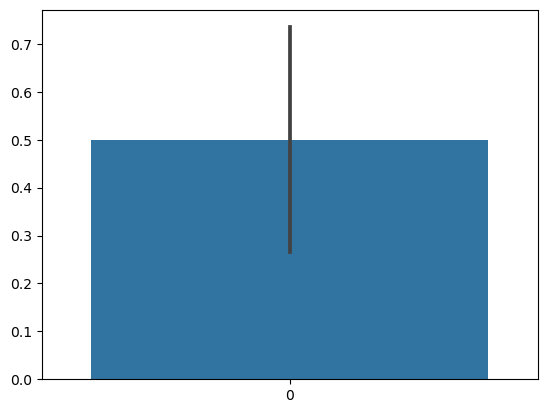

In [92]:
sns.barplot(y.value_counts(normalize=True))


# 3. Modelagem dos dados

` [APAGAR ESTE TRECHO NO FINAL] Nessa parte, deve ser definido o tipo de problema (classificação/regressão). Vocês precisam **treinar pelo menos três (3) modelos** (pode ser testado mais que três modelos distintos) e de acordo com alguma métrica de avaliação (escolhida pelo grupo), decidir qual será o melhor modelo a ser utilizado`

A natureza do problema abordado consistirá na previsão do cliente em cometer ou não o churn (classificação). Para prever o Churn dos clientes, iremos testar inicialmente 3 modelos - Regressão Logística,  XGBoost e KNN, e através das métricas `[ESCREVER AS MÉTRICAS:  precisão, recall, F1-score e curva ROC (Receiver Operating Characteristic).]`, escolher qual será o modelo utilizado para a previsão de Churn. 



In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y # Os dados estão desbalanceados conforme o gráfico de churn
)

# Sanity check
print('Tamanho do dataset de treino: ' + str(len(y_train)))
print('Tamanho do dataset de teste: ' + str(len(y_test)))
print('Proporção da target no treino: ' + str(y_train.values.sum()/len(y_train)))
print('Proporção da target no teste: ' + str(y_test.values.sum()/len(y_test)))

# Check de consistência
assert len(y_train)+len(y_test) == len(y)

Tamanho do dataset de treino: 5634
Tamanho do dataset de teste: 1409
Proporção da target no treino: 0.2653532126375577
Proporção da target no teste: 0.2654364797728886


Após a separação, é necessário normalizar os dados de treinos e de teste devido aos modelos baseados em distância `(como o KNN)` performam melhor, não havendo distorção de distância.

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Padronização/Normalização apenas nos dados de treino
X_train_std = scaler.fit_transform(X_train)


X_test_std = scaler.transform(X_test)

## 3.1 Regressão logística

## 3.2 XGBoost

O algoritmo utiliza:
- Gradient Boost
- Regularização
- Approximate Greedy Algorithm
- Parallel Learning
- Weighted Quantile Sketch
- Sparsity-Aware split finding
- Cache-Aware Access
- Blocks for Out-of-Core Computation

In [109]:
# Instalando biblioteca

%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [132]:
# Instanciando o modelo

from xgboost import XGBClassifier

xgb = XGBClassifier(seed = 0)

# Fazendo o fit do modelo

xgb.fit(X_train_std, y_train)

# Predição

y_pred_xgb = xgb.predict(X_test_std)

In [135]:
# Verificando métricas para o modelo construído

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.59      0.52      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



Além das métricas usuais (acurácia, precisão, recall e f1-score), podemos também avaliar a métrica AUC-ROC uma vez que estamos lidando com problema de classificação.

Essa métrica mede a área abaixo da curva ROC (Receiver Operating Characteristics) que é uma curva de probabilidade e AUC (Area Under the Curve) é a área sob a curva. 

Dessa forma podemos medir o grau de separabilidade do modelo que está no intervalo [0, 1]. Quanto mais próximo de 1, mais o modelo acerta. Quanto mais próximo de 0, o modelo separa bem as classes, mas classifica erroneamente. Quanto mais perto de 0.5 o modelo é pior em separar as classes.

In [136]:
from sklearn.metrics import roc_auc_score

y_prob_xgb = xgb.predict_proba(X_test_std)

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb[:, 1]))

ROC-AUC Score: 0.8190214162081169


In [ ]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


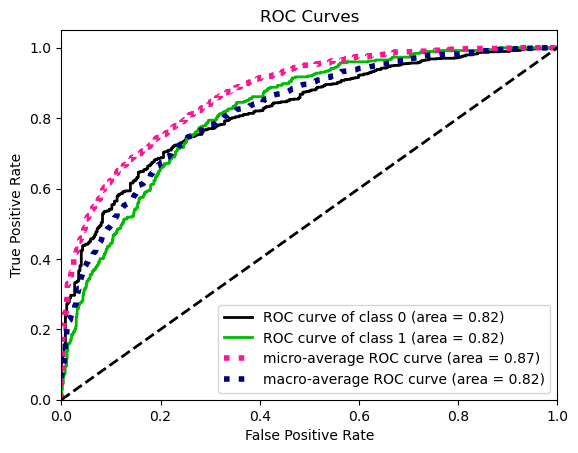

In [137]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, y_prob_xgb)
plt.show()

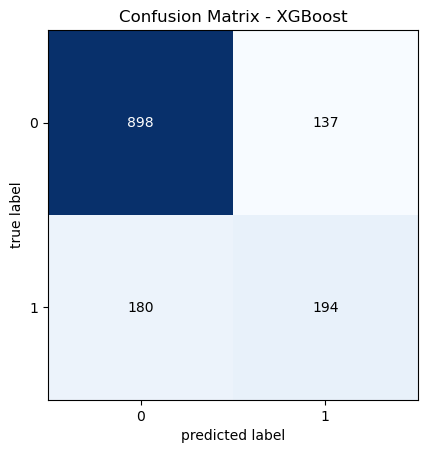

In [138]:
# Verificando matriz de confusão
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test,  y_pred_xgb)

plot_confusion_matrix(conf_mat=cm)
plt.title('Confusion Matrix - XGBoost') 
plt.show()

Para a otimização do modelo, vamos observar os parâmetros que  função recebe.

In [139]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [140]:
n_estimators = [200, 400, 600, 800]
max_depth = [6, 8, 10, 12]
reg_alpha = [0, 0.05, 0.5, 1, 5]
reg_lambda = [0, 0.05, 0.5, 1, 5]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1] 
min_child_weight = [1, 5, 10]

parametros_xgb = {
  "n_estimators": n_estimators,
  "max_depth": max_depth,
  "reg_alpha": reg_alpha,
  "reg_lambda": reg_lambda,
  "learning_rate": learning_rate,
  "min_child_weight": min_child_weight
}

In [143]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

kfold_strat = StratifiedKFold(n_splits = 5)

random_search_xgb = RandomizedSearchCV(
    estimator = xgb,
    param_distributions = parametros_xgb,
    n_iter = 100,
    scoring = 'accuracy',
    cv = kfold_strat, 
    verbose = 2, # Score is also displayed
    n_jobs = -1
)

In [144]:
# Fit grid search

otimizacao_xgb = random_search_xgb.fit(X, y_train)

# Print grid search summary
otimizacao_xgb

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           impor...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': [6, 8, 10, 12],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [200, 400, 600, 800],
                                        'reg_alpha': [0, 0.05, 0.5, 1, 5],
                                        'reg_lambda': [0, 0.05, 0.5, 1, 5]},
                   scoring='accuracy', verbose=2)

In [145]:
otimizacao_xgb.cv_results_

print(otimizacao_xgb.cv_results_['mean_test_score'].mean())

{'mean_fit_time': array([ 2.11660943,  1.45746784,  4.59921684,  1.61106548,  3.62793145,
         5.55809779,  4.43783779,  5.09623737,  9.31620231,  5.94947028,
         3.86524892,  5.52749653,  1.44467025,  2.37258492, 17.97834716,
         1.78223648,  6.70120049,  4.69540892,  1.62161002,  1.25881882,
         1.59112215,  2.52222452,  3.83263407,  8.45438261,  7.85690689,
         3.19247651,  8.21417189,  4.19220557,  5.2707603 ,  5.08813505,
         2.80452757,  5.29316835,  4.67514777,  2.38708887,  6.59014788,
         2.36949272,  1.60206409,  5.43261561,  3.57474985,  4.76812243,
         7.28438191,  4.60741463, 13.06471133,  1.61351218,  8.86528826,
        12.21967444,  1.75830936,  1.20564795,  5.12988715,  0.75012035,
        12.81290879, 10.50628724,  2.44089108,  4.58009501,  3.14165373,
         2.4737555 ,  1.53977709,  1.37145157,  3.67661762,  7.02585707,
         4.22397709,  6.82124114,  4.06566973,  3.63451619,  2.72889667,
         2.50478096,  9.9335505 , 

In [146]:
otimizacao_xgb.best_params_

{'reg_lambda': 0.05,
 'reg_alpha': 0.05,
 'n_estimators': 200,
 'min_child_weight': 10,
 'max_depth': 10,
 'learning_rate': 0.01}

In [147]:
cvs = pd.DataFrame(otimizacao_xgb.cv_results_)

cvs.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
mean_fit_time,2.116609,1.457468,4.599217,1.611065,3.627931,5.558098,4.437838,5.096237,9.316202,5.94947,...,10.70632,4.345197,8.767223,7.097623,3.865347,8.374332,2.724472,3.060348,2.013038,4.201379
std_fit_time,0.136934,0.084868,0.236514,0.067258,0.091275,0.165671,0.096085,0.066938,0.159965,0.115672,...,0.088651,0.099279,0.49512,0.239008,0.049641,0.204018,0.056417,0.119109,0.038795,0.287583
mean_score_time,0.033596,0.025598,0.060505,0.029017,0.099956,0.068571,0.071739,0.149394,0.119013,0.093939,...,0.185023,0.099977,0.084768,0.100343,0.068643,0.128295,0.047044,0.046289,0.03507,0.067328
std_score_time,0.003199,0.003201,0.010245,0.006858,0.000051,0.002852,0.006765,0.000903,0.007346,0.009496,...,0.017077,0.000283,0.011083,0.00515,0.006943,0.009308,0.005711,0.004692,0.004703,0.008119
param_reg_lambda,0,0.05,5,0,0.05,5,0,0.05,0,0,...,0.05,0,0.05,0,0.05,5,0.5,0.05,0,0.5
param_reg_alpha,5,5,1,0.5,0,1,5,0,0.5,0,...,0.05,0.05,1,1,0.5,0.5,1,1,0.05,5
param_n_estimators,600,200,400,200,600,600,600,800,400,600,...,800,400,400,600,400,800,400,400,200,600
param_min_child_weight,10,1,1,5,10,5,1,5,1,10,...,1,1,1,1,5,1,1,5,10,1
param_max_depth,12,6,8,6,10,10,6,10,12,8,...,10,12,12,8,8,8,6,6,8,6
param_learning_rate,0.1,0.001,0.001,0.001,0.1,0.001,0.01,0.1,0.01,0.001,...,0.01,0.1,0.0001,0.01,0.01,0.01,0.1,0.0001,0.0001,0.01


In [150]:
# Instanciando modelo otimizado
xgb_otimizado = XGBClassifier(**otimizacao_xgb.best_params_)

# Fazendo o Fit
xgb_otimizado.fit(X_train_std, y_train)

# Predição
y_pred_xgb_otimizado = xgb_otimizado.predict(X_test_std)

# Verificando métricas para o modelo construído
print(classification_report(y_test, y_pred_xgb_otimizado))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.66      0.45      0.54       374

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
# Utilizando pipelines

'''from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('Telco-Customer-Churn.csv')

proce

pipeline_xgb = '''

## 3.3 KNN
Através do cálculo de distância e seus vizinhos próximos, é possível prever em qual classe o cliente está inserido (Churn ou não Churn) com o KNN. 

O primeiro passo é escolher o valor de K, pois dependendo do valor de K, temos diferentes cenários:

- K baixo: aumenta a complexidade, aumenta a variância ( atenção ao overfiting) e baixo viés
- K alto: diminui a complexidade, diminui a variância (atenção ao underfiting) e aumenta o viés

Portanto o propósito é escolher um K que não tenha alto overfiting ou alto underfiting.

In [ ]:
# Bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score




def plot_complexity_curve(
    k_list,
    knn_model,
    x_train,
    x_test,
    y_train,
    y_test):
  train_scores = []
  test_scores = []

  for k in k_list:
    knn = knn_model(k)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

  fig, ax = plt.subplots(figsize=(12, 8))
  ax.plot(k_list, train_scores, label = 'Train acc', color='blue')
  ax.plot(k_list, test_scores, label = 'Test acc', color='red')

  ax.set(
      title='kNN com diferentes valores de $k$',
      xlabel='Número de vizinhos',
      ylabel='Acc'
  )
  ax.legend()

  return (train_scores, test_scores)


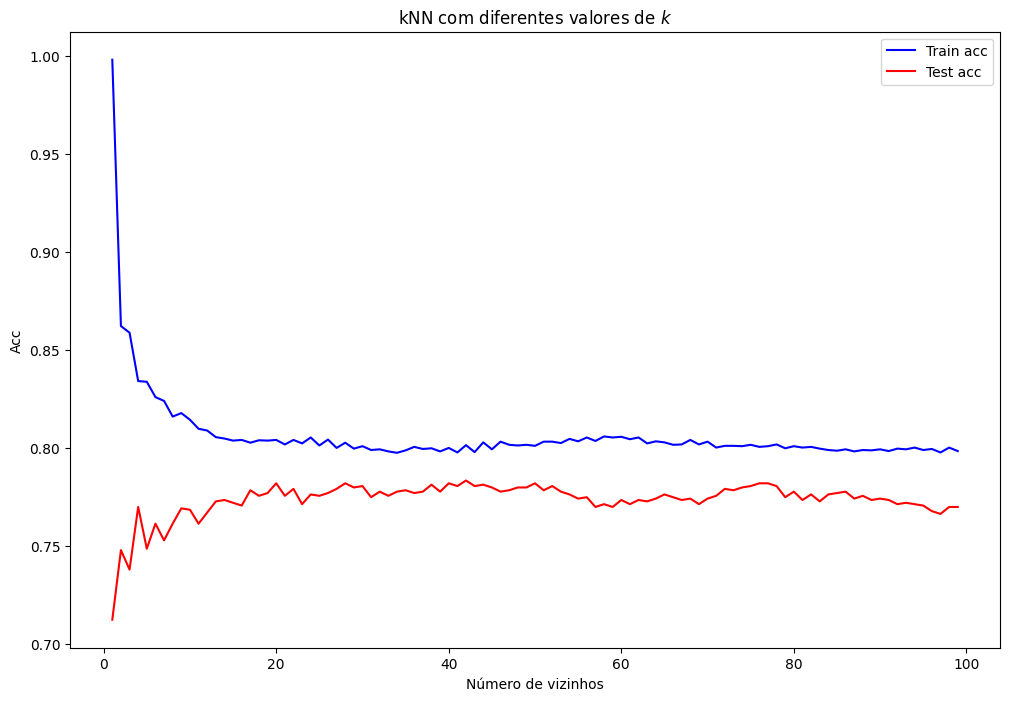

In [ ]:
#Criando uma lista de valores de K
k_lista = np.arange(1, 100)


train_scores, test_scores = plot_complexity_curve(
    k_list=k_lista,
    knn_model=KNeighborsClassifier,
    x_train=X_train_std,
    x_test=X_test_std,
    y_train=y_train,
    y_test=y_test
)

Observando o gráfico e os valores de acuária dos dados de Teste, podemos ver que o K que possui maior acurácia é o K próximo de 40. Abaixo de K= 8 há um overfiting e próximo a 80, o modelo começa a apresentar underfiting. Agora vamos pegar o melhor valor de K:

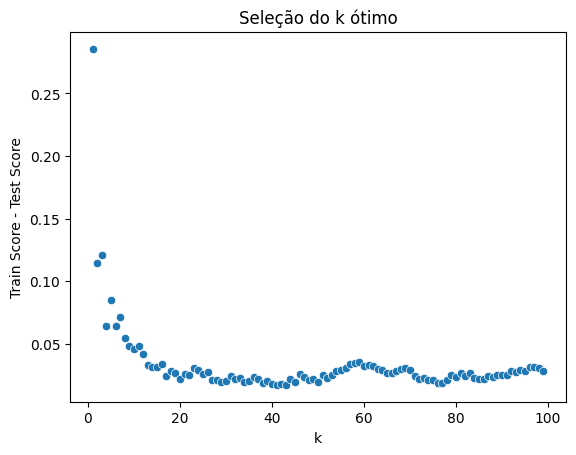

Valor ótimo de k: 41


In [ ]:
# Encontrando o valor de k value que minimniza o a diferença
score_diff = np.array(train_scores) - np.array(test_scores)
optimal_k = k_lista[np.argmin(score_diff)]

# Plot the score difference
sns.scatterplot(x=k_lista, y=score_diff)
plt.xlabel('k')
plt.ylabel('Train Score - Test Score')
plt.title('Seleção do k ótimo')
plt.show()

print(f"Valor ótimo de k: {optimal_k}")

Através do gráfico acima, temos que o pico mínimo é onde K = 41, sendo este o K que será utilizado no modelo a seguir.

`Discorrer sobre o tempo de fitting ser mais rápido do que o de predição `

In [ ]:
import time

# Start o timer para o fitting
start_time_fit = time.time()

knn = KNeighborsClassifier(41)
knn.fit(X_train_std, y_train)

# End timer do fitting
end_time_fit = time.time()

# Start do timer para a predição
start_time_predict = time.time()

y_pred_knn = knn.predict(X_test_std)

# End timer da predição
end_time_predict = time.time()

# Cálculo do tempo de fitting e predição
fitting_time = end_time_fit - start_time_fit
prediction_time = end_time_predict - start_time_predict

print(f"Tempo de fitting: {fitting_time: .4f} segundos")
print(f"Tempo de predição: {prediction_time: .4f} segundos")

Tempo de fitting:  0.0050 segundos
Tempo de predição:  0.1805 segundos


`colocar conclusão do tempo de fitting e predict`

## 3.4 Comparação entre os modelos

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.59      0.58      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



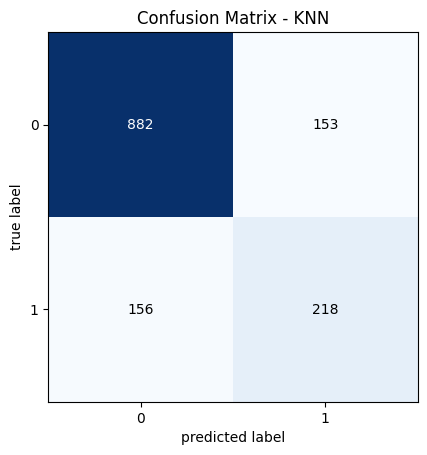

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)

plot_confusion_matrix(conf_mat=cm)
plt.title('Confusion Matrix - KNN') 
plt.show()

Temos que o KNN acertou 882 verdadeiros negativos de 1191 pontos e acertou 218 como Verdadeiro Positivo de 374 pontos.

# 4. Otimização do Modelo

`[APAGAR ESTE TRECHO NO FINAL] A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);`




# 5. Conclusão

`[APAGAR ESTE TRECHO NO FINAL] Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.`